In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#from matplotlib import animation
from mpl_toolkits.basemap import Basemap
from collections import Counter
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/xingobar/Downloads/predictemall/300k.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,pokemonId,latitude,longitude,appearedLocalTime,_id,cellId_90m,cellId_180m,cellId_370m,cellId_730m,cellId_1460m,...,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151,class
0,16,20.525745,-97.460829,2016-09-08T03:57:45,NTgxMDkzOTk4MTM5MjUwMjIzNw==,9645139108510564000,9645139108711890000,9645139108443455000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,16
1,133,20.523695,-97.461167,2016-09-08T03:57:37,OTQ1NDgzODc1MjM3NDEzMTI2MQ==,9645139109852742000,9645139109785633000,9645139110590940000,9645139109517197000,9645139113812165000,...,False,False,False,False,False,False,False,False,False,133
2,16,38.903590,-77.199780,2016-09-08T03:57:25,NTQ0OTQ0NDA1Nzg2ODg3OTg2OQ==,9923201472785285000,9923201472986612000,9923201473791918000,9923201477013144000,9923201481308110000,...,False,False,False,False,False,False,False,False,False,16
3,13,47.665903,-122.312561,2016-09-08T03:56:22,NTU2MTU1NDM4NzA2MDk1MDcxNw==,6093392705025474600,6093392705092583400,6093392705897889800,6093392702676664300,6093392715561566200,...,False,False,False,False,False,False,False,False,False,13
4,133,47.666454,-122.311628,2016-09-08T03:56:08,MTY2ODg4MTAzMTczMDE0MTUwNTM=,6093392707709829100,6093392707776938000,6093392708045373400,6093392711266598900,6093392715561566200,...,False,False,False,False,False,False,False,False,False,133


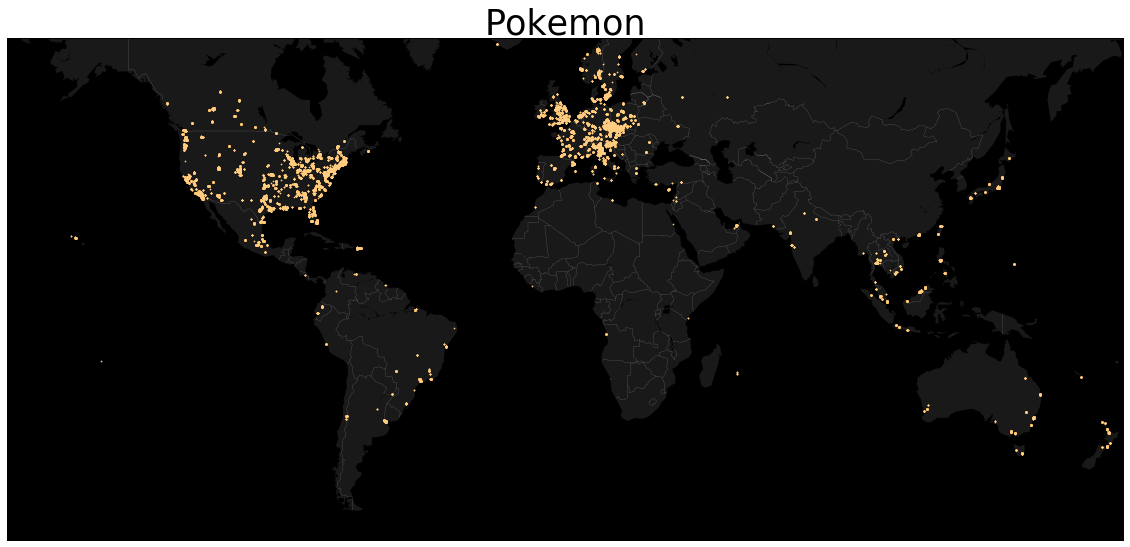

In [4]:
plt.figure(figsize = (20,10))
map = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             resolution = 'c')

map.fillcontinents(color='#191919',lake_color='#000000') ## grey land  , dark lake 
map.drawmapboundary(fill_color = '#000000')
map.drawcountries(linewidth=0.1, color="w") ## thine white line
x,y = map(df.longitude.tolist(),df.latitude.tolist())
map.scatter(x,y,s=3,c='#ffcc80',lw=0,alpha = 1,zorder=5)
plt.title('Pokemon',fontsize=35)
plt.show()

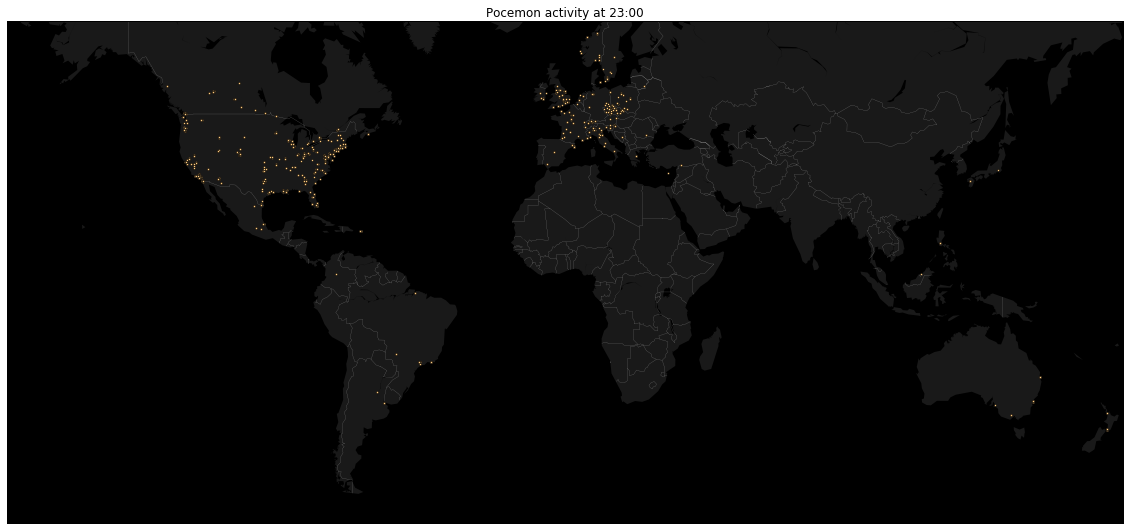

In [18]:
time_groups = df.groupby('appearedHour') ## group 0 - 23

plt.figure(figsize=(20,10))

map = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             resolution = 'c')

map.fillcontinents(color='#191919',lake_color='#000000') ## grey land  , dark lake 
map.drawmapboundary(fill_color = '#000000')
map.drawcountries(linewidth=0.1, color="w") ## thine white line


x,y = 0,0
point = map.plot(x,y,'ro',markersize=2,color='#ffcc80')[0]

def init():
    point.set_data([],[])
    return point,

def animate(i):
    lon = time_groups.get_group(i)['longitude'].values
    lat = time_groups.get_group(i)['latitude'].values
    x,y = map(lon,lat)
    point.set_data(x,y)
    plt.title('Pocemon activity at %2d:00' % (i))
    return point,


output = animation.FuncAnimation(plt.gcf(), animate, init_func=init, frames=24, interval=500, blit=True, repeat=False)
output.save("pokemon.gif", writer='imagemagick')
plt.show()                      

# City Activity

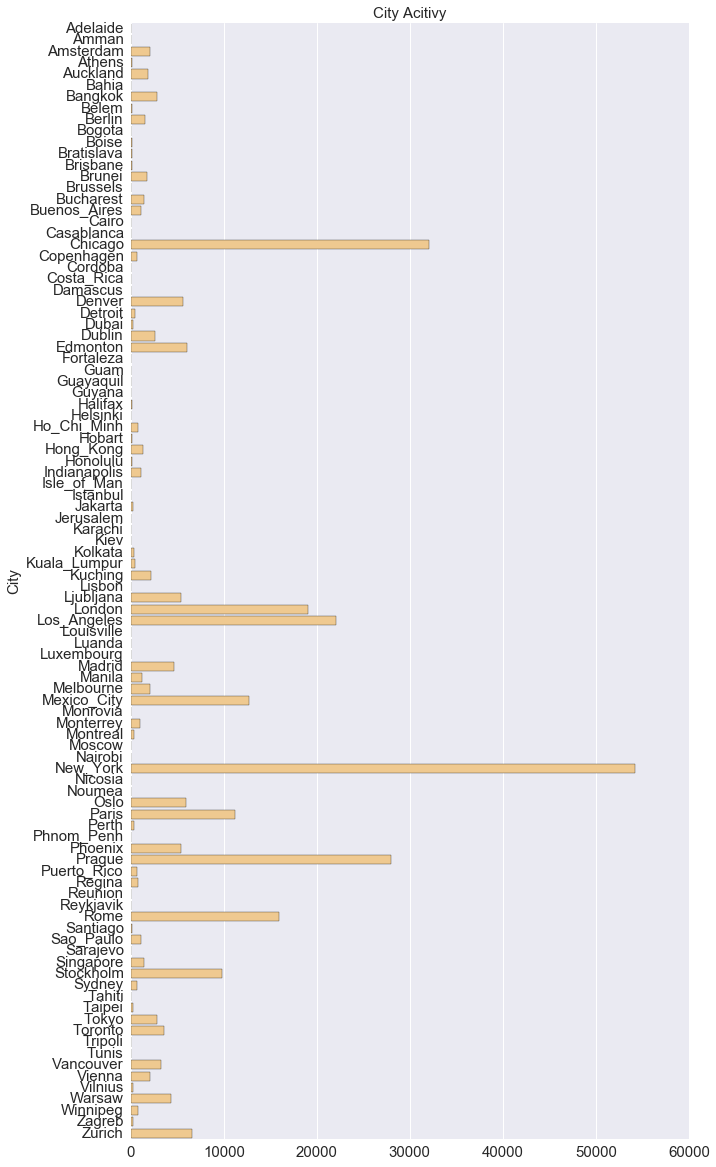

In [24]:
fig,ax = plt.subplots(figsize=(10,20))
city_count = df.groupby('city')['city'].size() ## group the size and count 
city_name = city_count.index
city_values = city_count.values

sns.barplot(x = city_values , y = city_name , ax =ax , color='#ffcc80')
ticks = plt.setp(ax.get_yticklabels(),fontsize = 15)
ticks = plt.setp(ax.get_xticklabels(),fontsize = 15)
plt.ylabel('City',fontsize=15)
plt.title('City Acitivy',fontsize=15)

# Top 10 City Activity

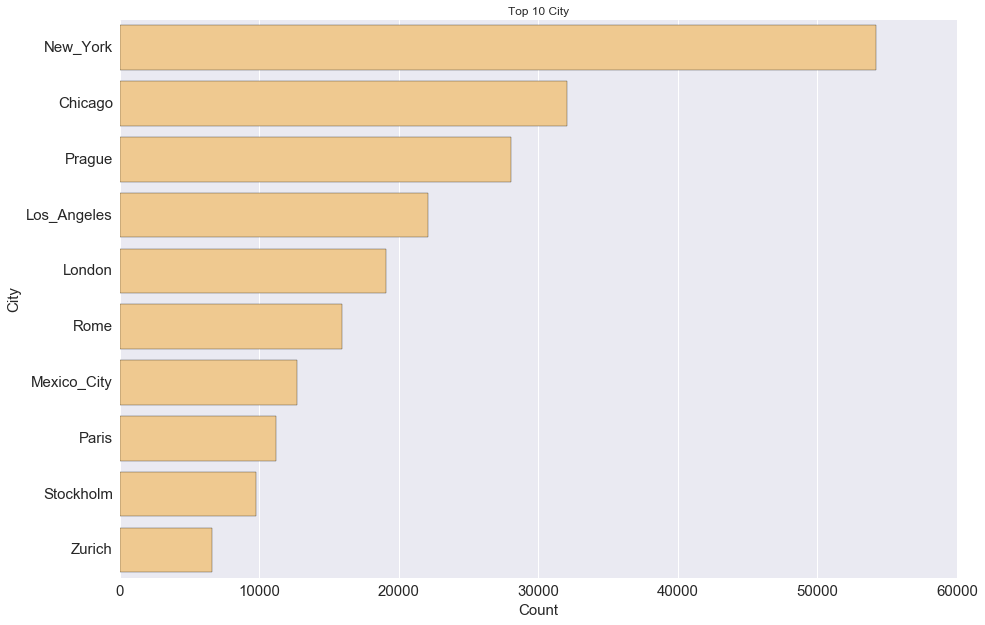

In [29]:
fig,ax = plt.subplots(figsize=(15,10))
top_ten_city = Counter(df['city'].dropna().tolist()).most_common(10)
top_ten_city_name = [city[0] for city in top_ten_city]
top_ten_city_values = [city[1] for city in top_ten_city]

sns.barplot(x = top_ten_city_values, y=top_ten_city_name , ax =ax , color='#ffcc80' )
plt.title('Top 10 City')
plt.ylabel('City',fontsize=15)
plt.xlabel('Count',fontsize=15)
ticks = plt.setp(ax.get_xticklabels(),fontsize=15)
ticks = plt.setp(ax.get_yticklabels(),fontsize=15)

# Activity within local time

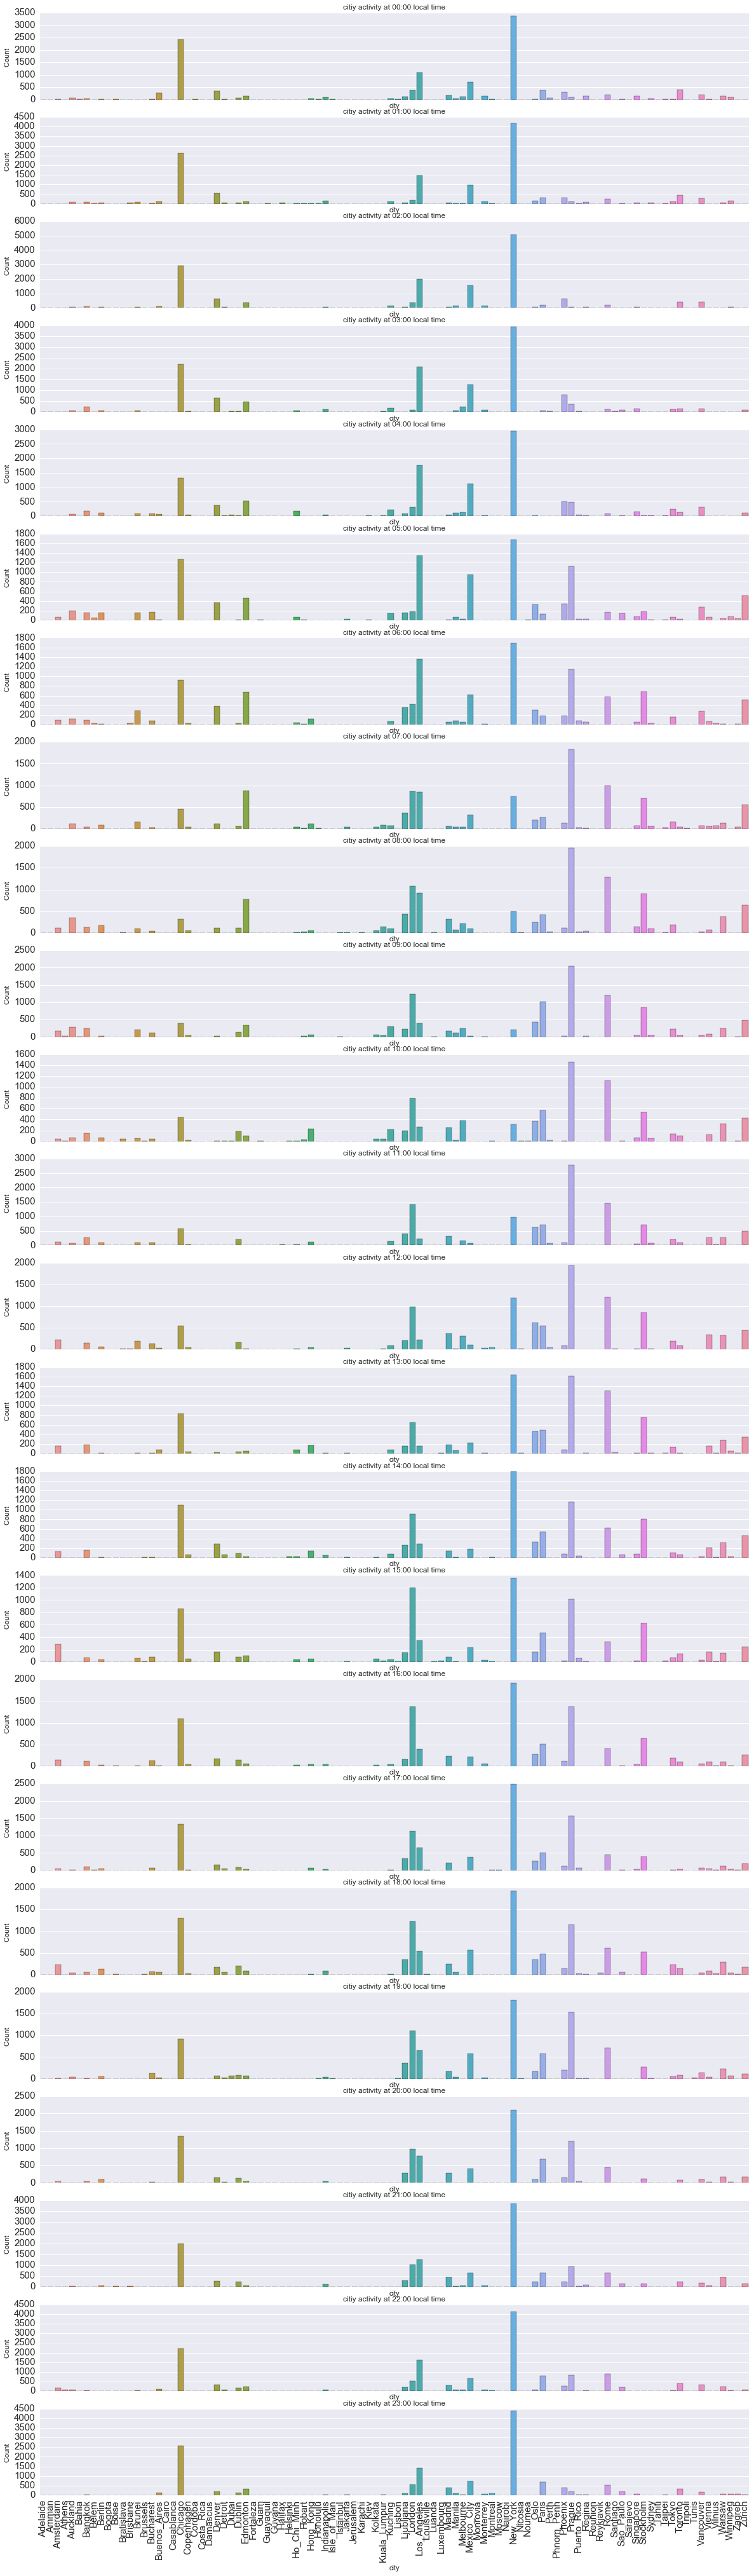

In [45]:
df['LocalTime'] = df['appearedLocalTime'].apply(lambda x:x.split('T')[1])

## hour 
local_time_by_hour = df.groupby(['city',df['LocalTime'].map(lambda x:int(x.split(':')[0]))]).size()
local_time_by_hour = local_time_by_hour.unstack()
local_time_by_hour.fillna(0,inplace=True)

## share x axis
fig,axes = plt.subplots(len(local_time_by_hour.columns),1,figsize=(20,70),sharex=True)

## plotting
for i in xrange(len(local_time_by_hour.columns)):
    
    sns.barplot(x = local_time_by_hour.index , y = local_time_by_hour[i] , ax = axes[i])
    
    axes[i].set(ylabel='Count ' , title = 'citiy activity at %02d:00 local time' % (i))
    ticks = plt.setp(axes[i].get_xticklabels(),fontsize=15 , rotation = 90)
    ticks = plt.setp(axes[i].get_yticklabels(),fontsize=15)

# weather to city

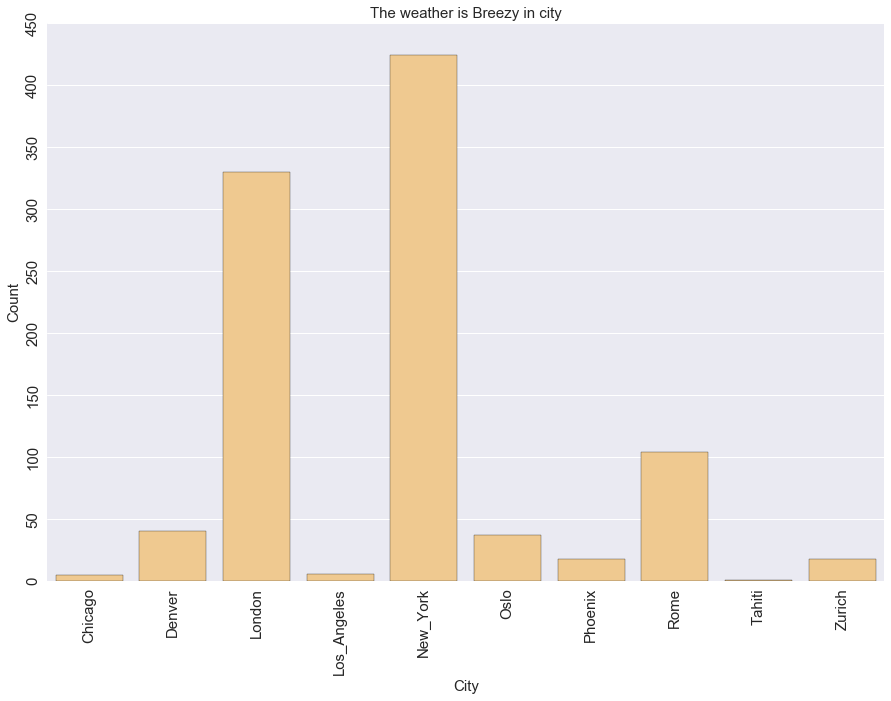

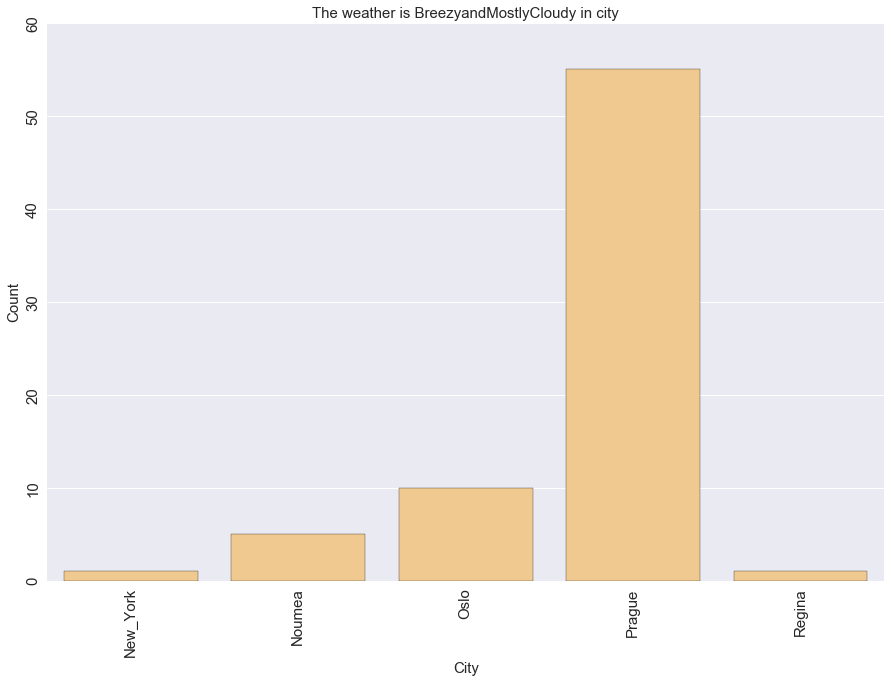

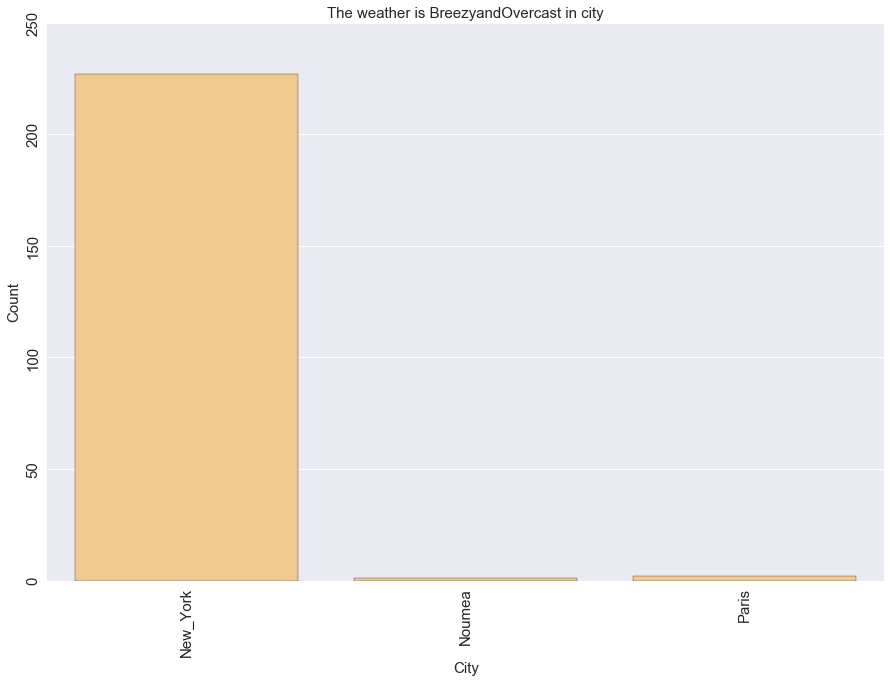

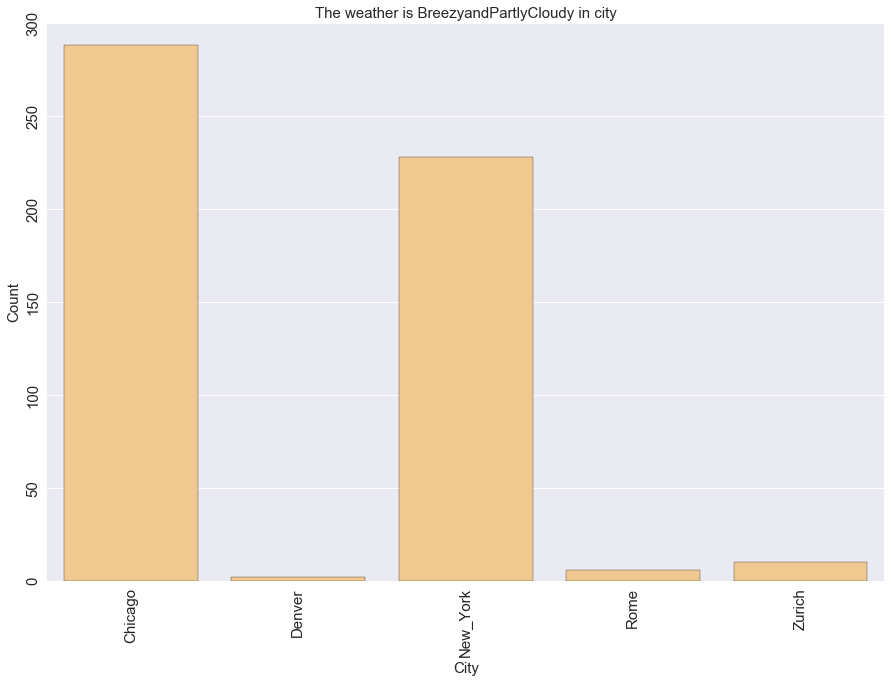

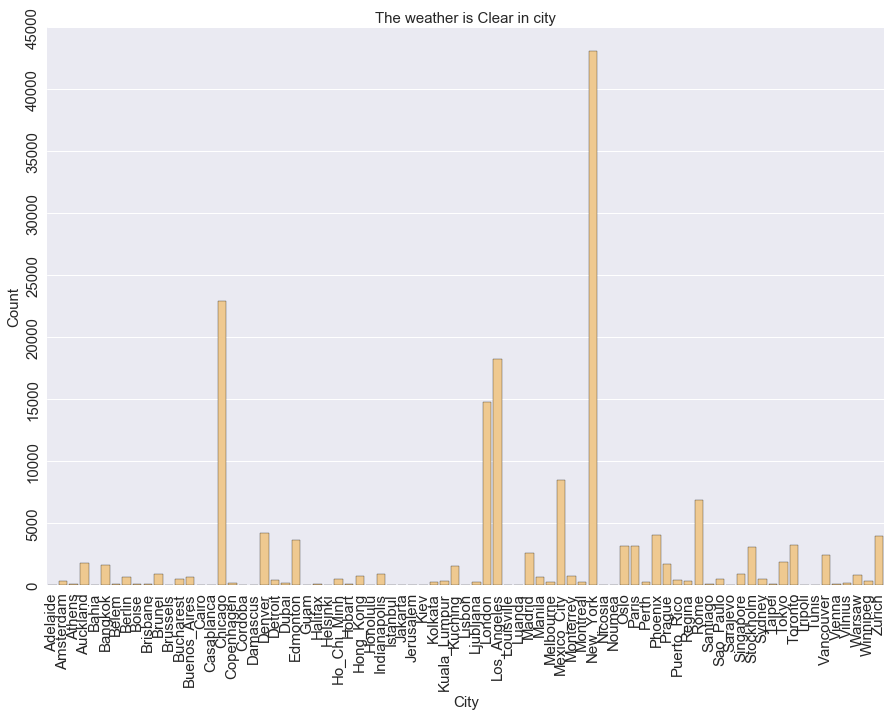

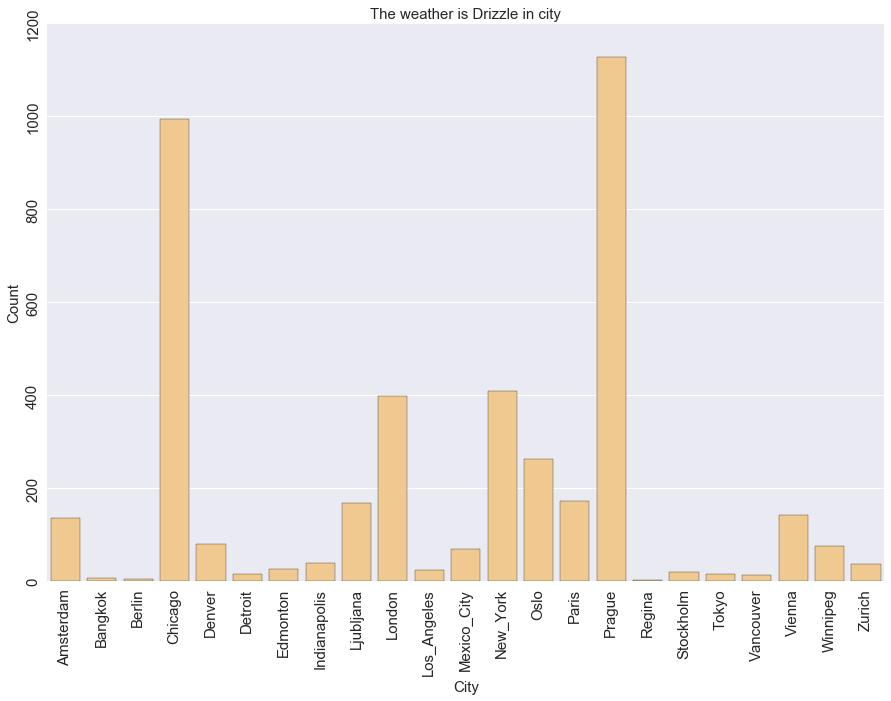

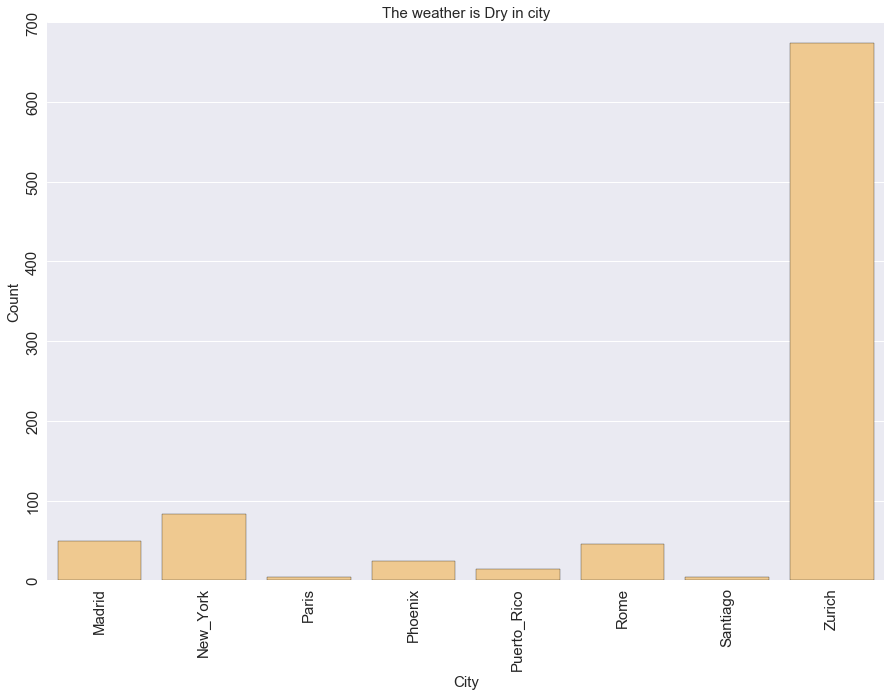

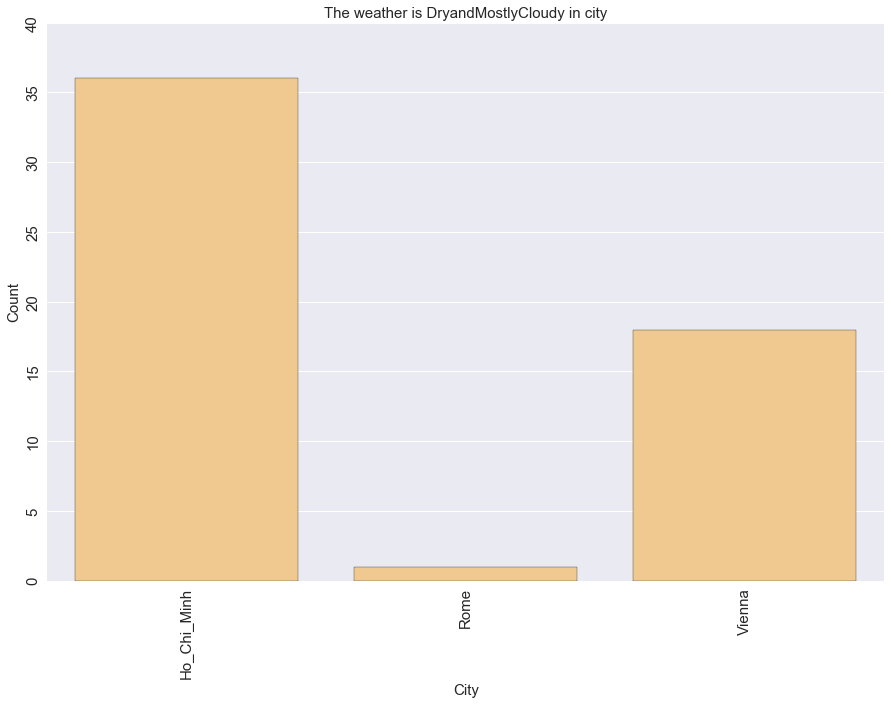

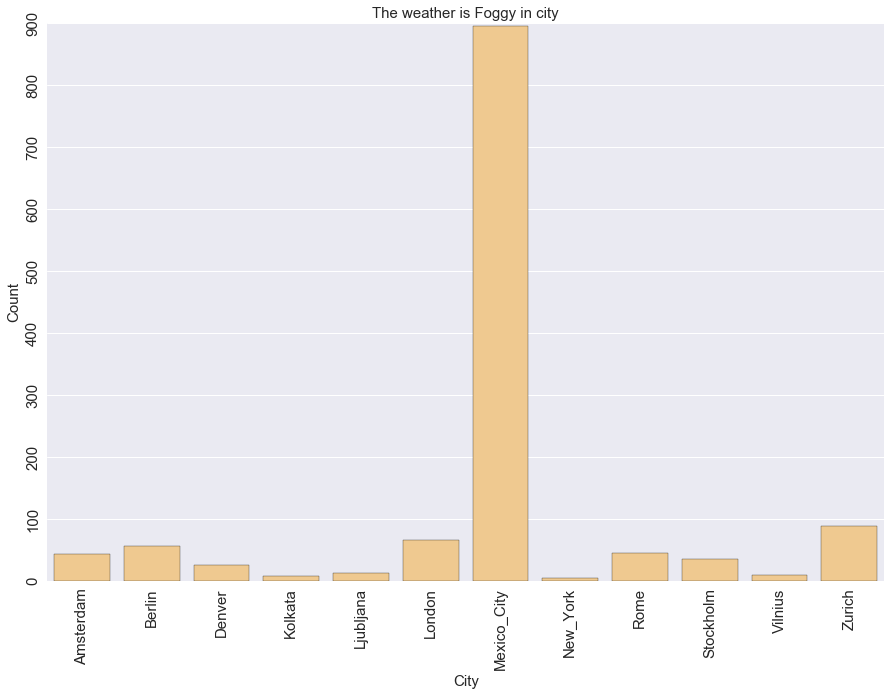

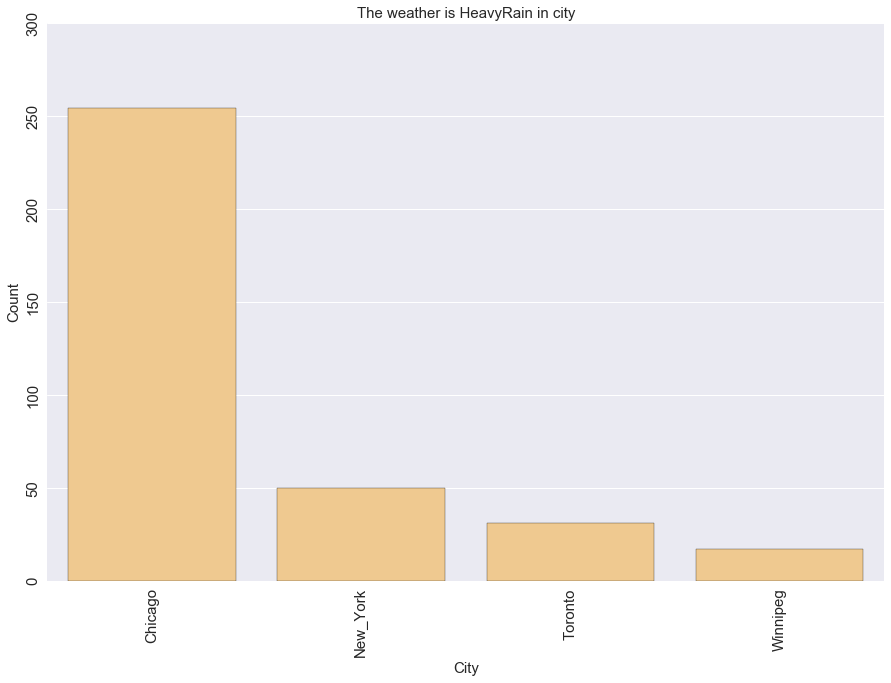

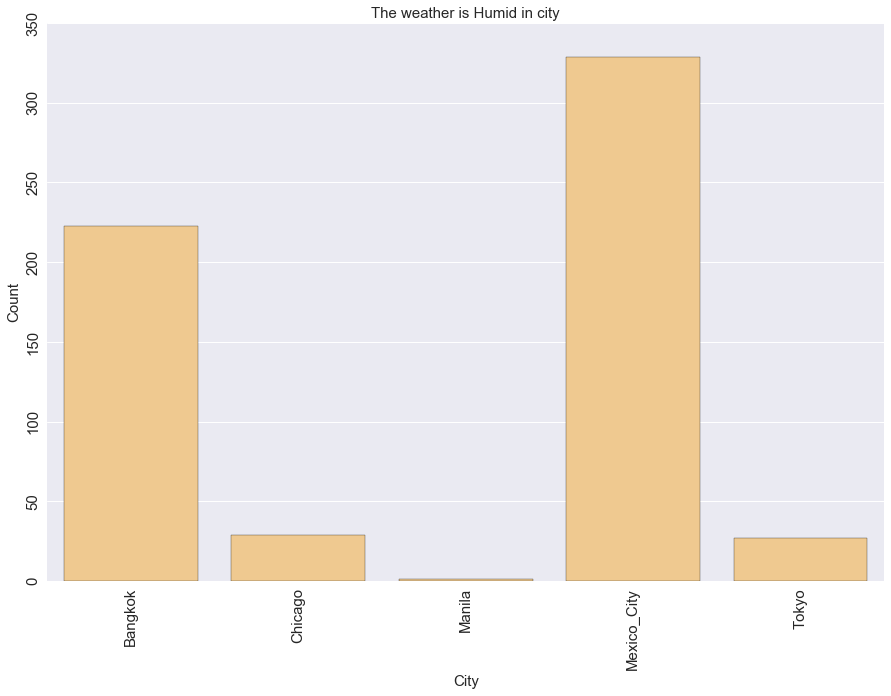

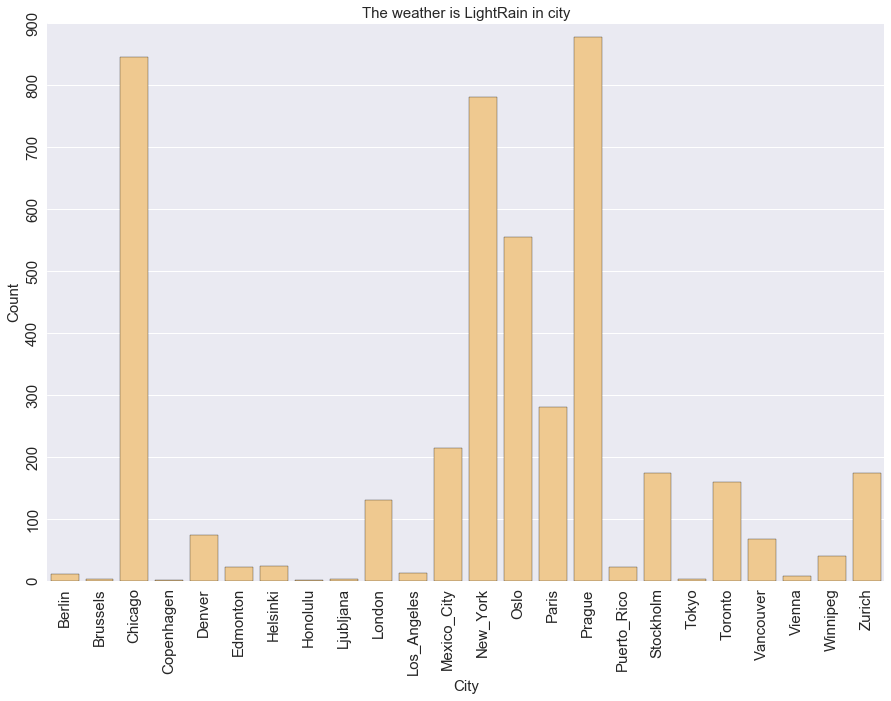

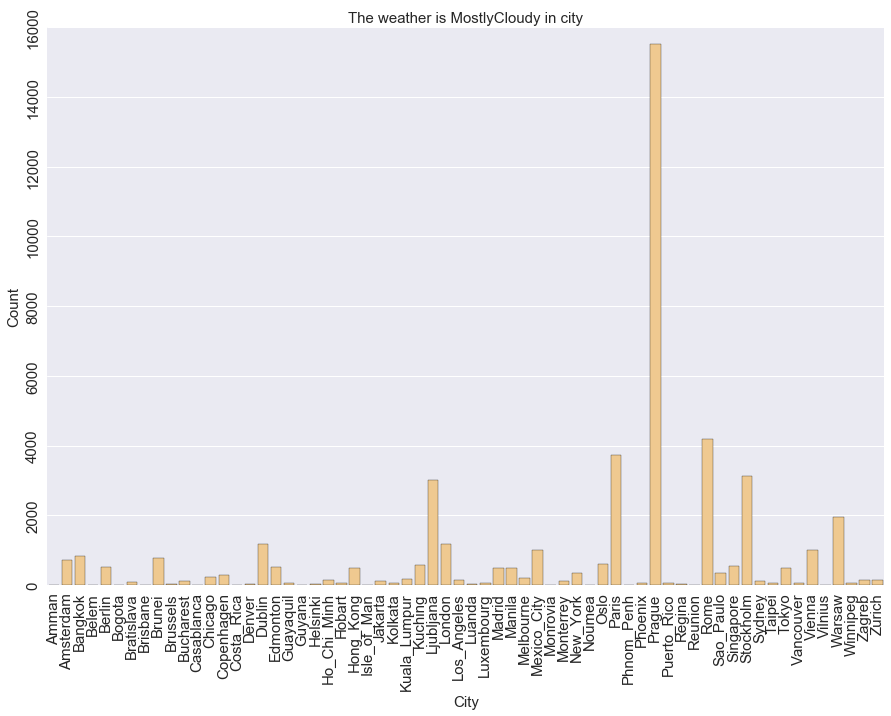

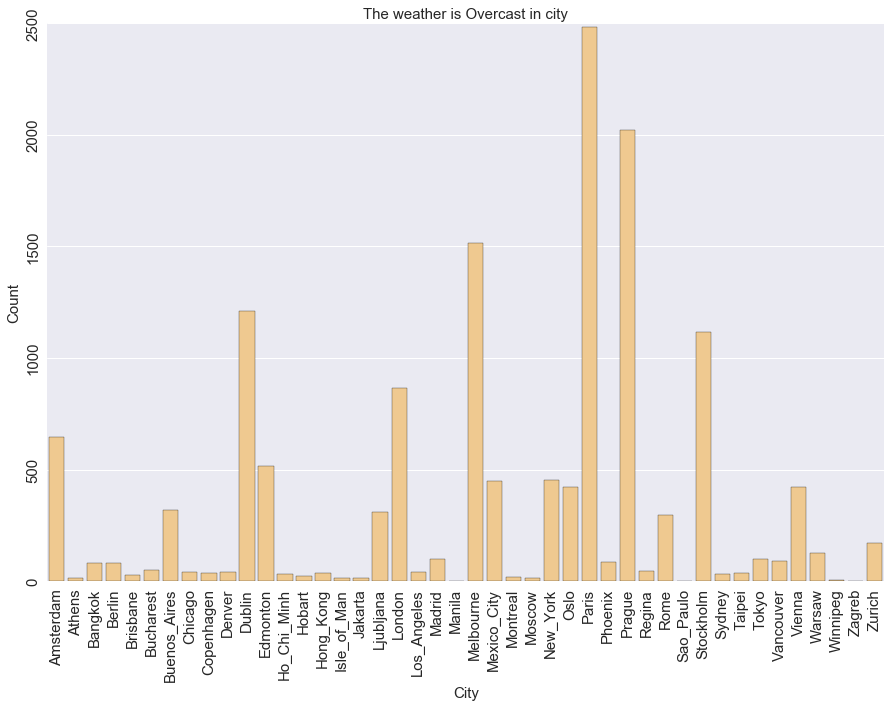

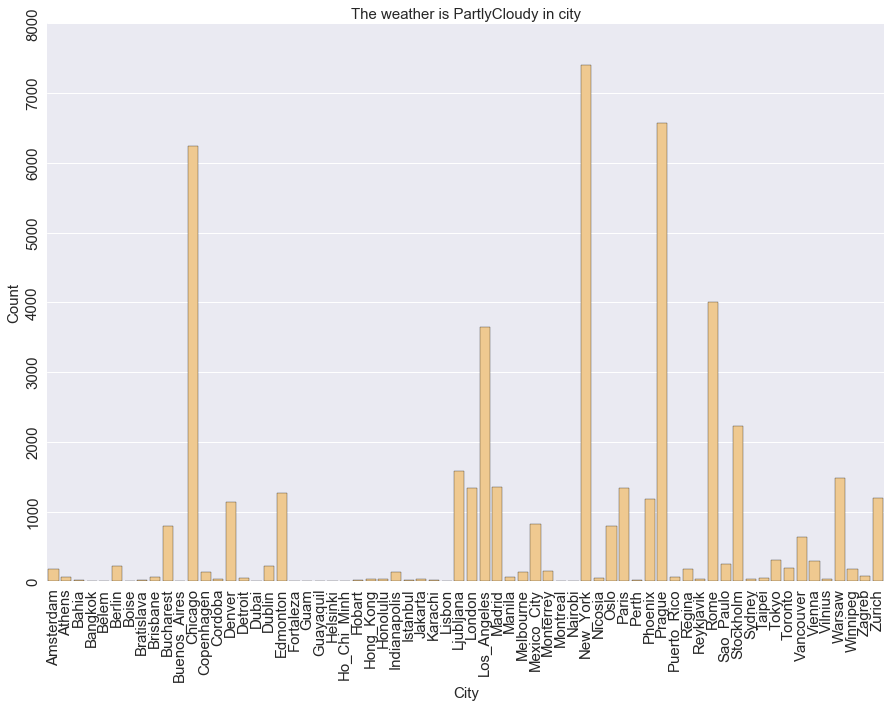

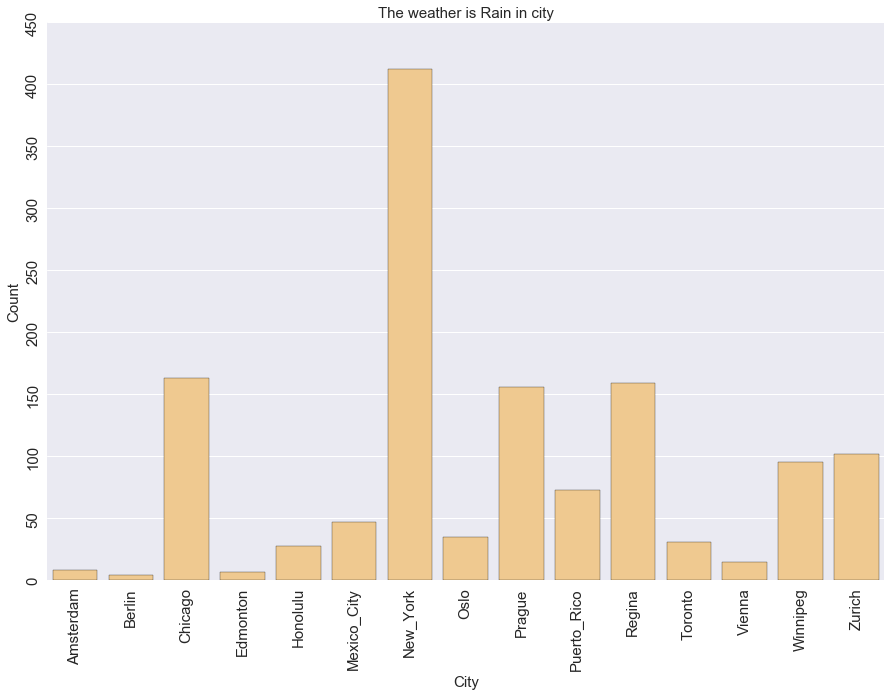

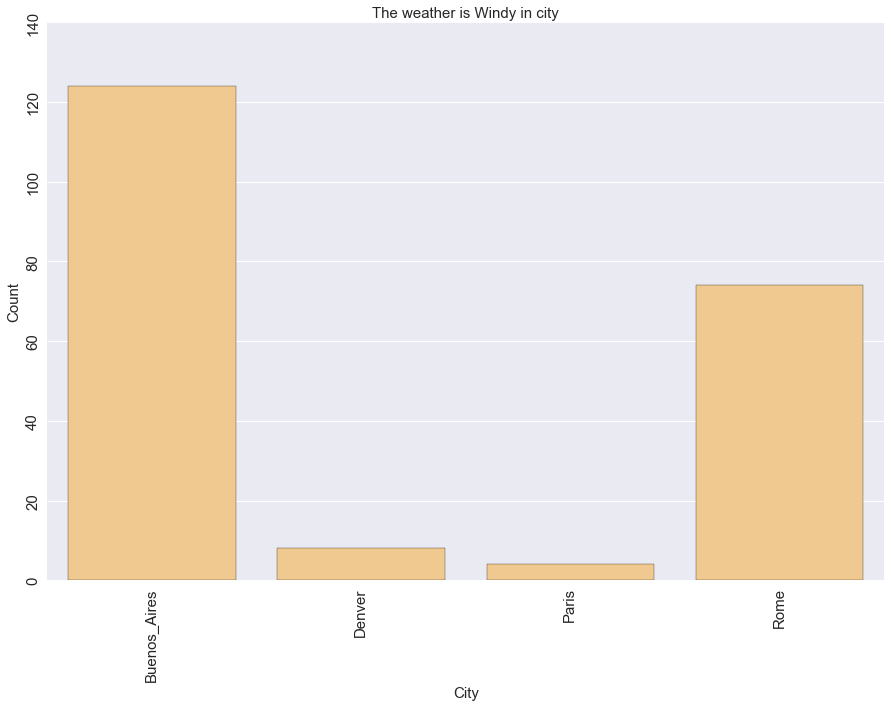

In [106]:
activity_to_weather = df.groupby(['weather','city']).size()
weather = activity_to_weather.index.levels[0]

for i in xrange(len(weather)):
    if len(activity_to_weather[weather[i]].index) <=2:
        continue
    fig,ax = plt.subplots(1,1 , figsize = (15,10))
    sns.barplot(x = activity_to_weather[weather[i]].index ,   ## city
                y = activity_to_weather[weather[i]].values ,  ## count
                color='#ffcc80',ax=ax)
    plt.title('The weather is %s in city' %(weather[i]),fontsize=15)
    plt.setp(ax.get_xticklabels(),fontsize=15,rotation = 90)
    plt.setp(ax.get_yticklabels(),fontsize=15,rotation = 90)
    plt.ylabel('Count',fontsize=15)
    plt.xlabel('City',fontsize=15)

# Heatmap